In [41]:
import torch
from torch.utils.data import Subset,DataLoader, TensorDataset, ConcatDataset
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

In [40]:
batch_size = 64
num_classes = 10

In [25]:
train_set = datasets.MNIST('/content',train=True,download=True,transform=[transforms.ToTensor()])
test_set = datasets.MNIST('/content',train=False,download=True,transform=[transforms.ToTensor()])

### Preprocessing

In [26]:
# inversion and normalization
invert = lambda image : 1 - image # function to invert the image
normalize = lambda image : image / 255 # function for bringing pixel values in range [0,1]

def preprocessing(dataset):
    dataset_images = dataset.data.numpy() # convert the dataset into numpy array
    dataset_labels = dataset.targets.numpy() # convert the labels into numpy array
    dataset_images = normalize(dataset_images)
    dataset_images = invert(dataset_images)
    return dataset_images,dataset_labels

train_images,train_labels = preprocessing(train_set)
test_images,test_labels = preprocessing(test_set)

### Prepare the data

In [36]:
training_set = TensorDataset(torch.Tensor(train_images),torch.Tensor(train_labels))
testing_set = TensorDataset(torch.Tensor(test_images),torch.Tensor(test_labels))

# prepare subset of training data per class 
training_subsets = {target: Subset(training_set,[i for i,(X,y) in enumerate(training_set) if y == target]) for _,target in train_set.class_to_idx.items()}
training_loaders = {target: DataLoader(subset,batch_size=batch_size) for target,subset in training_subsets.items()}

# prepare subset of testing data per class
testing_subsets = {target: Subset(testing_set,[i for i,(X,y) in enumerate(testing_set) if y == target]) for _,target in test_set.class_to_idx.items()}
testing_loaders = {target: DataLoader(subset,batch_size=batch_size) for target,subset in testing_subsets.items()}

torch.Size([64, 28, 28])


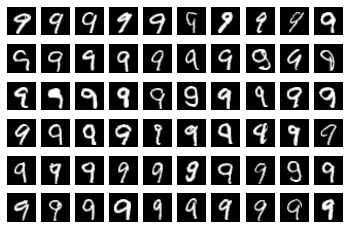

In [39]:
dataiter = iter(testing_loaders[9])
images,labels = dataiter.next()
print(images.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1,num_of_images+1):
  plt.subplot(6,10,index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze(),cmap='gray_r')

### Define the network

In [19]:
class NeuralNetwork(nn.Module):
  def __init__(self,classes,channels):
    self.conv1 = nn.Conv2d(channels,6,5)
    self.conv2 = nn.Conv2d(channels,10,5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(10*4*4,100)
    self.fc2 = nn.Linear(100,20)
    self.fc3 = nn.Linear(20,classes)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.shape[0],-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

### Prepare initial training set

torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])


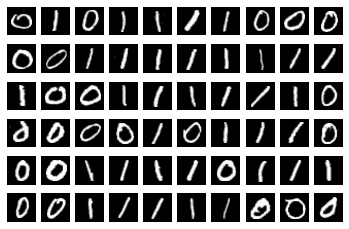

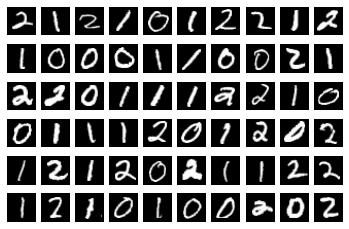

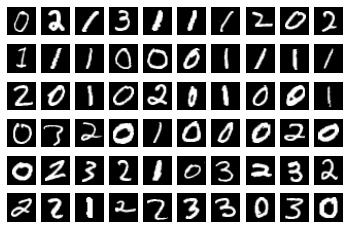

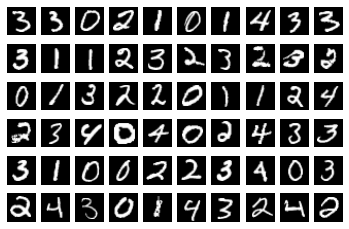

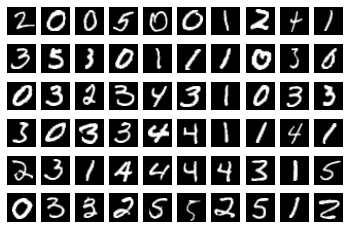

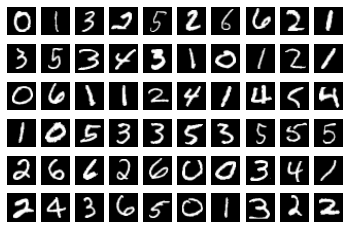

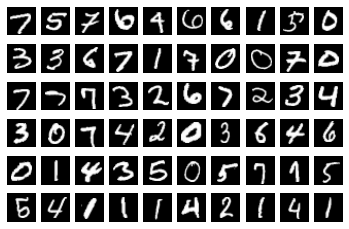

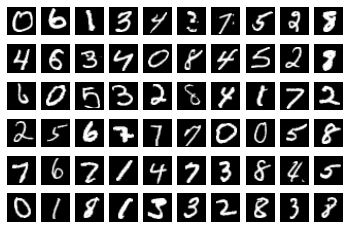

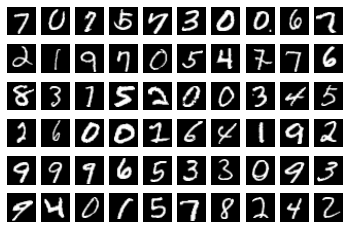

In [47]:
multi_class_train_set = training_subsets[0] # create initial datasets
multi_class_test_set = testing_subsets[0] # create initial datasets

for i in range(1,num_classes):
  # concat the training set of the new class with old training set
  multi_class_train_set = ConcatDataset([multi_class_train_set,training_subsets[i]])
  # concat the testing set of the new class with old testing set
  multi_class_test_set = ConcatDataset([multi_class_test_set,testing_subsets[i]])
